In [ ]:
#1. Implement the SIFT algorithm to detect and match key points between two images.
#2. Apply the SURF algorithm to detect and match key points between two images with different scales and orientations.
#4. Implement the Harris corner detector to find and visualize corners in a grayscale image.

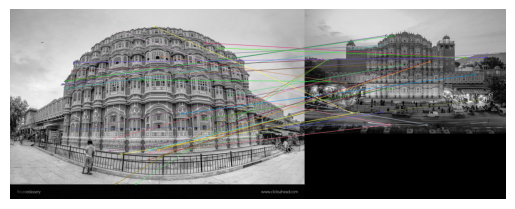

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('image2.jpg',0)
img2 = cv2.imread('image1.1.jpg',0)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

matched_image = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(matched_image),plt.axis('off')
plt.show()

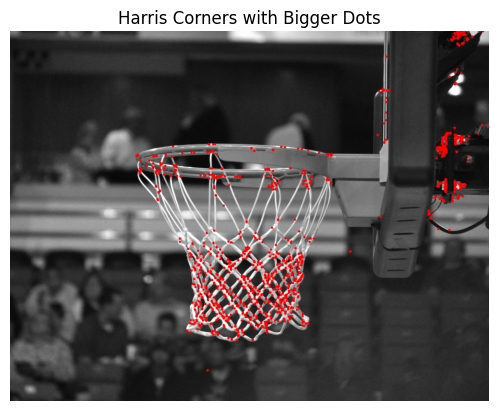

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
gray = cv2.imread('Basketball.jpg', 0)

# Convert to float32
gray_float = np.float32(gray)

# Harris corner detection
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate to enhance corner points
dst = cv2.dilate(dst, None)

# Threshold to find strong corners
threshold = 0.01 * dst.max()

# Convert grayscale to BGR so we can draw colored circles
img_with_corners = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Loop over each pixel and draw a circle where corner is detected
for y in range(dst.shape[0]):
    for x in range(dst.shape[1]):
        if dst[y, x] > threshold:
            cv2.circle(img_with_corners, (x, y), radius=3, color=(0, 0, 255), thickness=3)  # red dot

# Show result
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners with Bigger Dots')
plt.axis('off')
plt.show()


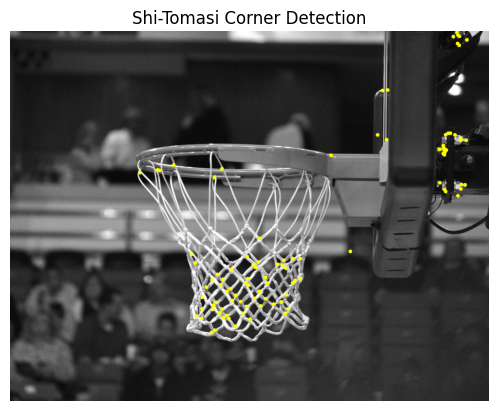

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale
gray = cv2.imread('Basketball.jpg', 0)

# Convert grayscale to color so we can draw colored circles
img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Detect corners using Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Convert to integer coordinates
corners = corners.astype(int)

# Draw corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), radius=3, color=(0, 255, 255), thickness=15)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis('off')
plt.show()
